<a href="https://colab.research.google.com/github/marcojr93/i2a2_desafios_projetos/blob/main/I2A2%20Desafio%204%20-%20Lotofacil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DESAFIO 4

A base de dados a seguir, contém todos as informações disponibilizadas sobre os sorteios da Loto fácil, desde o primeiro sorteio. De todas as loterias da Caixa Econômica esta é a que tem a maior probabilidade de premiação (basta olharem a coluna de ganhadores com 11 números). As regras de funcionamento atual desta loteria, vocês encontrarão no site da Caixa Econômica Federal. Observe que as regras mudaram ligeiramente ao longo do tempo e isto está refletido nos dados. Adicionalmente, na planilha vocês encontrarão uma coluna chamada Id que é um identificador binário do sorteio realizado e os números sorteados em ordem crescente e ordem de sorteio. A coluna da Cidade contém os municípios ou os estados onde houveram ganhadores com 15 números. Eventualmente, não há ganhadores com 15 números, então o valor é acumulado para o próximo sorteio. Isto pode ser notado quando na coluna Ganhadores 15 Números há valor 0. Se vocês pesquisarem na internet, encontrarão diversas combinações mágicas e infalíveis, sequencias tanto dentro do próprio sorteio quanto entre sorteios, e assim por diante.

A tarefa é:

Criar um ou mais notebooks utilizando esta base.
Efetuar a limpeza dos dados**
Efetuar a análise exploratória dos dados
Utilizado as dicas "mágicas" encontradas na internet, fazer a engenharia de features para criar novos atributos em sua base (P.ex. quantidade de números pares, números repetidos em relação ao sorteio anterior, etc.)
Utilizar os algoritmos estudados nesta semana e nas duas semanas seguintes para criar um modelo que faça a previsão dos números sorteados.
É muito, muito, muito provável que vocês não terão sucesso na etapa 5. Então, temos algumas perguntas para responder:
Porque não tive sucesso.
Qual a entropia destes dados?
Qual modelo teve o melhor resultado e porquê?**
O Estudo deve seguir a metodologia CRISP-DS, descrevendo as etapas realizadas. Ao final, coloquem também seus comentários. Como sempre, a entrega é obrigatória e vocês tem até o dia 24/04 às 23h59.

## METODOLOGIA CRISP-DS

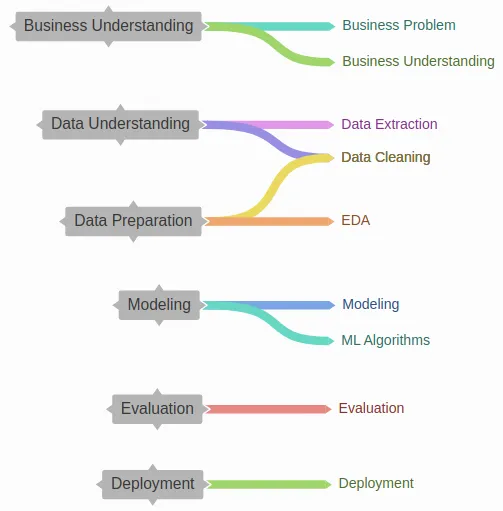

### ENTENDIMENTO DO NEGÓCIO

A Lotofácil é uma loteria da Caixa Econômica Federal, que consiste em sortear 15 números dentre 25 possíveis. Os jogadores escolhem um conjunto de 15 números e ganham um prêmio se acertarem 11, 12, 13, 14 ou 15 números. O objetivo deste desafio é criar um modelo de aprendizado de máquina que faça a previsão dos números sorteados.

### ENTENDIMENTO DOS DADOS

Inicialmente para análise e entendimento dos dados é necessário importar algumas bibliotecas para acessarmos as informações, usaremos a biblioteca Pandas e Numpy nessa primeira etapa

In [48]:
import pandas as pd
import numpy as np

In [49]:
# Extração/Importação dos dados

df = pd.read_excel('Sorteios_Completo.xlsx')
df.head()

,Concurso,Data Sorteio,Id,Bola 01,Bola 02,Bola 03,Bola 04,Bola 05,Bola 06,Bola 07,...,Ganhadores 11 Números,Valor Rateio 15 Números,Valor Rateio 14 Números,Valor Rateio 13 Números,Valor Rateio 12 Números,Valor Rateio 11 Números,Acumulado 15 Números,Estimativa Prêmio,Valor Acumulado Especial,Local 15 Números
0,1,2003-09-29,30062390,2,3,5,6,9,10,11,...,257593,49765.82,689.84,10.0,4,2.0,0.0,NaN,NaN,"BA, PR, SP"
1,2,2003-10-06,13426041,1,4,5,6,7,9,11,...,478188,596323.70,1388.95,10.0,4,2.0,0.0,NaN,NaN,SP
2,3,2003-10-13,13217769,1,4,6,7,8,9,10,...,608211,400623.70,2173.36,10.0,4,2.0,0.0,NaN,NaN,SP
3,4,2003-10-20,29858459,1,2,4,5,8,10,12,...,706657,902226.02,1498.72,10.0,4,2.0,0.0,NaN,NaN,MT
4,5,2003-10-27,30203275,1,2,4,8,9,11,12,...,860992,380017.55,687.49,10.0,4,2.0,0.0,NaN,NaN,"BA, MS"


In [50]:
print(df.info()) # Avaliando os tipos de dados existentes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2780 entries, 0 to 2779
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Concurso                  2780 non-null   int64         
 1   Data Sorteio              2780 non-null   datetime64[ns]
 2   Id                        2780 non-null   int64         
 3   Bola 01                   2780 non-null   int64         
 4   Bola 02                   2780 non-null   int64         
 5   Bola 03                   2780 non-null   int64         
 6   Bola 04                   2780 non-null   int64         
 7   Bola 05                   2780 non-null   int64         
 8   Bola 06                   2780 non-null   int64         
 9   Bola 07                   2780 non-null   int64         
 10  Bola 08                   2780 non-null   int64         
 11  Bola 09                   2780 non-null   int64         
 12  Bola 10             

In [51]:
print('O dataset possui ', df.shape[0], ' linhas e ', df.shape[1], ' colunas') # Detalhamento da quantidade de linahs e colunas

O dataset possui  2780  linhas e  48  colunas


In [52]:
# Verifica se há valores nulos no arquivo

print('Número de valores nulos em cada coluna:')
print(df.isnull().sum())

Número de valores nulos em cada coluna:
Concurso                      0
Data Sorteio                  0
Id                            0
Bola 01                       0
Bola 02                       0
Bola 03                       0
Bola 04                       0
Bola 05                       0
Bola 06                       0
Bola 07                       0
Bola 08                       0
Bola 09                       0
Bola 10                       0
Bola 11                       0
Bola 12                       0
Bola 13                       0
Bola 14                       0
Bola 15                       0
Sorteado 01                   0
Sorteado 02                   0
Sorteado 03                   0
Sorteado 04                   0
Sorteado 05                   0
Sorteado 06                   0
Sorteado 07                   0
Sorteado 08                   0
Sorteado 09                   0
Sorteado 10                   0
Sorteado 11                   0
Sorteado 12                   0


### PREPARAÇÃO DOS DADOS

A etapa de preparação dos dados nada mais é que realizar um data cleaning, atentando-se aos seguintes pontos:



*   Padrão de formatação
*   Valores faltantes ou NaN
*   Dados que não influenciarão na análise


In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings(action = 'ignore')
import time
from tqdm import tqdm

In [54]:
df.head(1) # Observação de como está o dataset

,Concurso,Data Sorteio,Id,Bola 01,Bola 02,Bola 03,Bola 04,Bola 05,Bola 06,Bola 07,...,Ganhadores 11 Números,Valor Rateio 15 Números,Valor Rateio 14 Números,Valor Rateio 13 Números,Valor Rateio 12 Números,Valor Rateio 11 Números,Acumulado 15 Números,Estimativa Prêmio,Valor Acumulado Especial,Local 15 Números
0,1,2003-09-29,30062390,2,3,5,6,9,10,11,...,257593,49765.82,689.84,10.0,4,2.0,0.0,NaN,NaN,"BA, PR, SP"


In [55]:
# Excluir colunas desnecessárias
df = df.drop(['Id','Local 15 Números' ], axis=1)
df.head(1) # Imprimindo dataset após modificação

,Concurso,Data Sorteio,Bola 01,Bola 02,Bola 03,Bola 04,Bola 05,Bola 06,Bola 07,Bola 08,...,Ganhadores 12 Números,Ganhadores 11 Números,Valor Rateio 15 Números,Valor Rateio 14 Números,Valor Rateio 13 Números,Valor Rateio 12 Números,Valor Rateio 11 Números,Acumulado 15 Números,Estimativa Prêmio,Valor Acumulado Especial
0,1,2003-09-29,2,3,5,6,9,10,11,13,...,48807,257593,49765.82,689.84,10.0,4,2.0,0.0,NaN,NaN


In [56]:
df.head(1)

,Concurso,Data Sorteio,Bola 01,Bola 02,Bola 03,Bola 04,Bola 05,Bola 06,Bola 07,Bola 08,...,Ganhadores 12 Números,Ganhadores 11 Números,Valor Rateio 15 Números,Valor Rateio 14 Números,Valor Rateio 13 Números,Valor Rateio 12 Números,Valor Rateio 11 Números,Acumulado 15 Números,Estimativa Prêmio,Valor Acumulado Especial
0,1,2003-09-29,2,3,5,6,9,10,11,13,...,48807,257593,49765.82,689.84,10.0,4,2.0,0.0,NaN,NaN


In [57]:
# substituindo valores nulos por zero
df.fillna(0, inplace=True)

In [58]:
print(df.isnull().sum())

Concurso                    0
Data Sorteio                0
Bola 01                     0
Bola 02                     0
Bola 03                     0
Bola 04                     0
Bola 05                     0
Bola 06                     0
Bola 07                     0
Bola 08                     0
Bola 09                     0
Bola 10                     0
Bola 11                     0
Bola 12                     0
Bola 13                     0
Bola 14                     0
Bola 15                     0
Sorteado 01                 0
Sorteado 02                 0
Sorteado 03                 0
Sorteado 04                 0
Sorteado 05                 0
Sorteado 06                 0
Sorteado 07                 0
Sorteado 08                 0
Sorteado 09                 0
Sorteado 10                 0
Sorteado 11                 0
Sorteado 12                 0
Sorteado 13                 0
Sorteado 14                 0
Sorteado 15                 0
Arrecadação_Total           0
Ganhadores

#### CRIANDO NOVAS FEATURES

Nessa etapa, será criada uma nova coluna ao dataset, que indica os núnmeros sorteados no concurso anterior. Isso pode servir como decisão para concursos futuros

In [59]:
# Primeiro, é necessário criar uma coluna com os números sorteados

df["Números Sorteados"] = df.apply(lambda row: [row[f"Sorteado {i:02}"] for i in range(1, 16)], axis=1)

In [60]:
# ordenar o dataset pela data do sorteio em ordem crescente
df = df.sort_values('Data Sorteio')

# criar uma nova coluna com os números sorteados anteriormente
df['numeros_sorteados_anteriormente'] = df['Números Sorteados'].shift(1)

# Precher o valor vazio da primeira linha com zero ou valor vazio
df['numeros_sorteados_anteriormente'].iloc[0] = 0

# Mostrar o resultado da nova feature
df.head() 


,Concurso,Data Sorteio,Bola 01,Bola 02,Bola 03,Bola 04,Bola 05,Bola 06,Bola 07,Bola 08,...,Valor Rateio 15 Números,Valor Rateio 14 Números,Valor Rateio 13 Números,Valor Rateio 12 Números,Valor Rateio 11 Números,Acumulado 15 Números,Estimativa Prêmio,Valor Acumulado Especial,Números Sorteados,numeros_sorteados_anteriormente
0,1,2003-09-29,2,3,5,6,9,10,11,13,...,49765.82,689.84,10.0,4,2.0,0.0,0.0,0.0,"[18, 20, 25, 23, 10, 11, 24, 14, 6, 2, 13, 9, ...",0
1,2,2003-10-06,1,4,5,6,7,9,11,12,...,596323.70,1388.95,10.0,4,2.0,0.0,0.0,0.0,"[23, 15, 5, 4, 12, 16, 20, 6, 11, 19, 24, 1, 9...","[18, 20, 25, 23, 10, 11, 24, 14, 6, 2, 13, 9, ..."
2,3,2003-10-13,1,4,6,7,8,9,10,11,...,400623.70,2173.36,10.0,4,2.0,0.0,0.0,0.0,"[20, 23, 12, 8, 6, 1, 7, 11, 14, 4, 16, 10, 9,...","[23, 15, 5, 4, 12, 16, 20, 6, 11, 19, 24, 1, 9..."
3,4,2003-10-20,1,2,4,5,8,10,12,13,...,902226.02,1498.72,10.0,4,2.0,0.0,0.0,0.0,"[16, 5, 25, 24, 23, 8, 12, 2, 17, 18, 1, 10, 4...","[20, 23, 12, 8, 6, 1, 7, 11, 14, 4, 16, 10, 9,..."
4,5,2003-10-27,1,2,4,8,9,11,12,13,...,380017.55,687.49,10.0,4,2.0,0.0,0.0,0.0,"[15, 13, 20, 2, 11, 24, 9, 16, 4, 23, 25, 12, ...","[16, 5, 25, 24, 23, 8, 12, 2, 17, 18, 1, 10, 4..."


### MODELAGEM

#### ANÁLISE EXPLORATÓRIA DOS DADOS

Antes de aplicação de qualquer modelo de machine learning é importante realizar uma EDA e entender melhor as tendências e comportamentos observados no dataset.

Variáveis com maiores correlações:
Valor Rateio 11 Números  Valor Rateio 13 Números    1.0
Valor Rateio 12 Números  Valor Rateio 13 Números    1.0
Valor Rateio 13 Números  Valor Rateio 11 Números    1.0
                         Valor Rateio 12 Números    1.0
Concurso                 Concurso                   1.0
Bola 13                  Bola 13                    1.0
Sorteado 08              Sorteado 08                1.0
Sorteado 06              Sorteado 06                1.0
Sorteado 05              Sorteado 05                1.0
Sorteado 04              Sorteado 04                1.0
dtype: float64

Variáveis com menores correlações:
Valor Rateio 14 Números  Ganhadores 15 Números     -0.386180
Ganhadores 15 Números    Valor Rateio 14 Números   -0.386180
Valor Rateio 14 Números  Ganhadores 14 Números     -0.356985
Ganhadores 14 Números    Valor Rateio 14 Números   -0.356985
Valor Rateio 14 Números  Ganhadores 13 Números     -0.297845
Ganhadores 13 Números    Valor Rateio 14 Números 

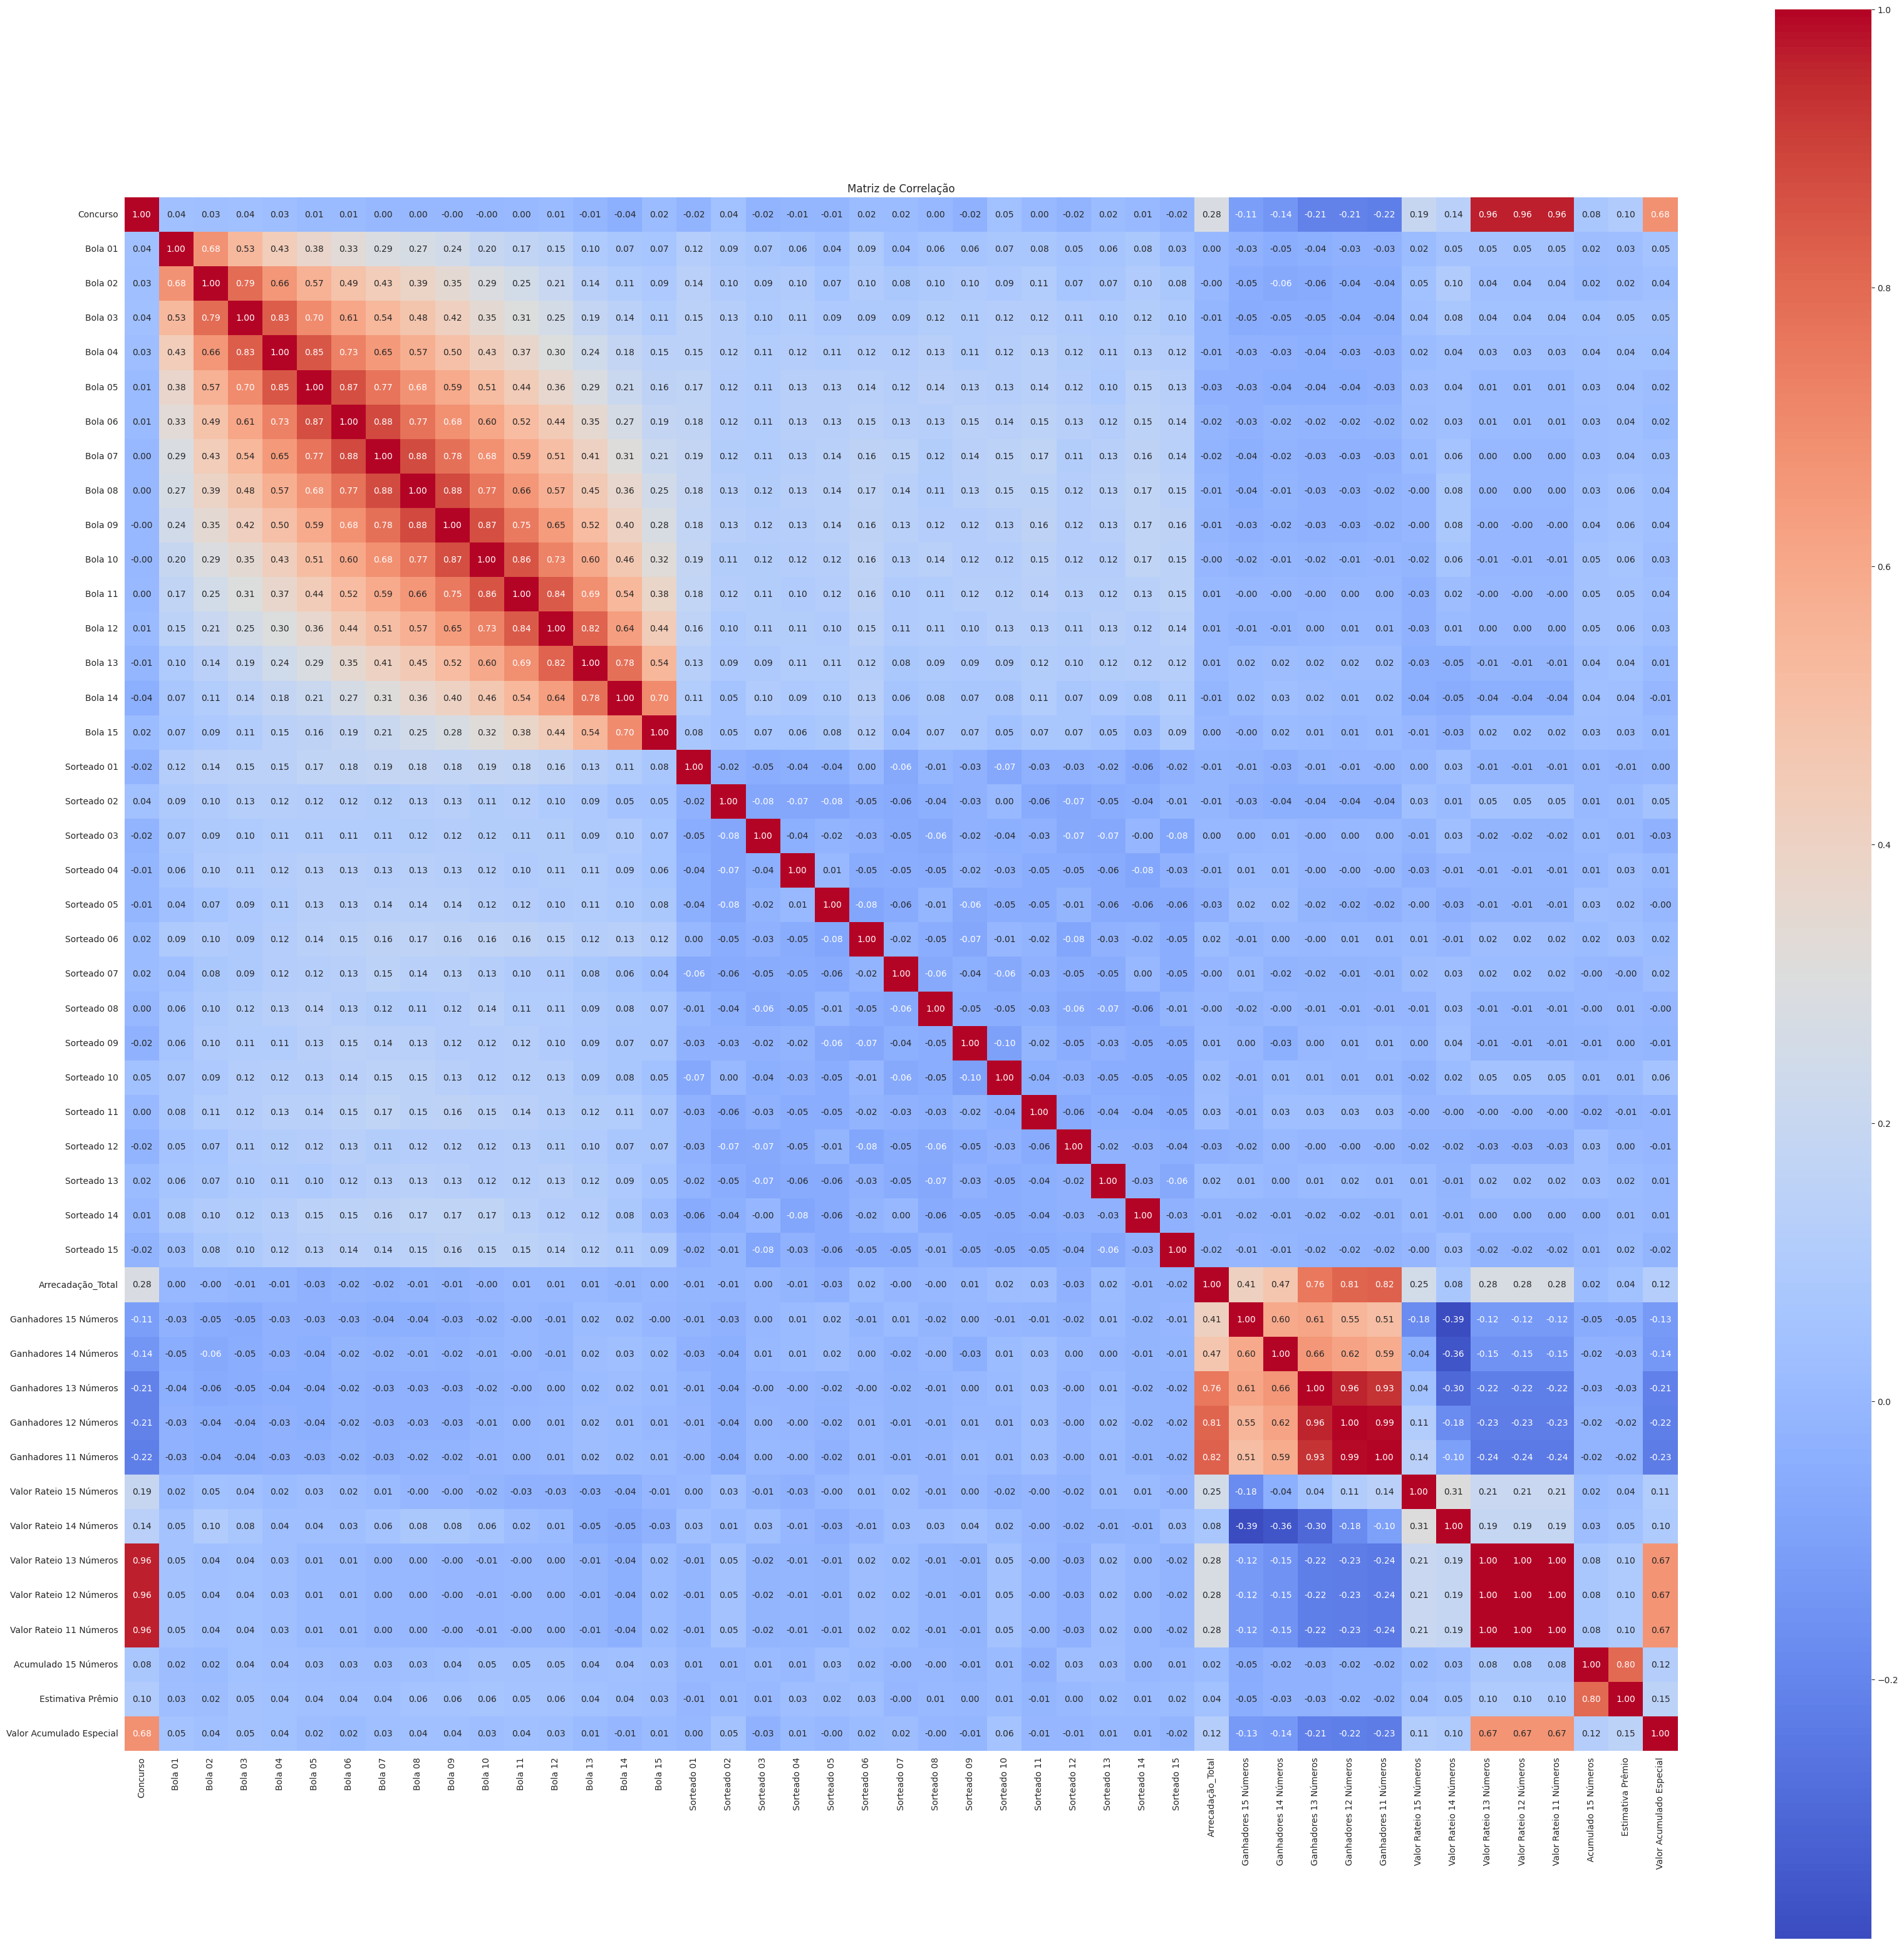

In [61]:
# Matriz de correlação
corr = df.corr()
# Define o tamanho da figura
plt.figure(figsize=(40,40))
# Heatmap da matriz de correlação
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', square=True)
plt.title('Matriz de Correlação')
# Exibe as variáveis com maiores correlações
print('Variáveis com maiores correlações:')
print(corr.unstack().sort_values(ascending=False)[:10])

# Exibe as variáveis com menores correlações
print('\nVariáveis com menores correlações:')
print(corr.unstack().sort_values(ascending=True)[:10])

# Exibe as variáveis sem correlação
no_corr = corr.unstack()[corr.unstack() == 0].index
print('\nVariáveis sem correlação:')
print(no_corr)
plt.show()

Podemos também tentar avaliar quais números possuem maior frequencia nos sorteios.

In [62]:
numeros = df.iloc[:, :15].values.flatten().astype('str')
numeros = pd.Series(numeros).apply(lambda x: int(x.split(' ')[0].replace('-', '')))
frequencia = pd.Series(numeros).value_counts().sort_index()


Os 5 números com maior frequência:
10    1730
11    1729
13    1703
14    1692
5     1686
dtype: int64


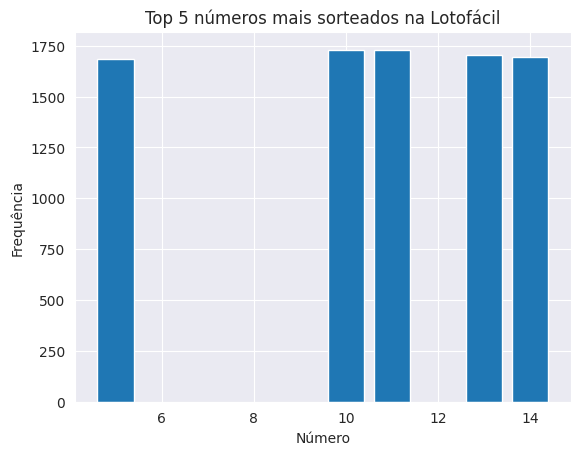

In [63]:
top_5 = frequencia.nlargest(5)
print('Os 5 números com maior frequência:')
print(top_5)

plt.bar(top_5.index, top_5.values)
plt.title('Top 5 números mais sorteados na Lotofácil')
plt.xlabel('Número')
plt.ylabel('Frequência')
plt.show()

#### APRENDIZADO DE MÁQUINA

Esta etapa tem o objetivo de tentar criar um modelo que seja possivel de prever os próximos resultados dos sorteios, com base no histórico realizado.

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [65]:
df.head()

,Concurso,Data Sorteio,Bola 01,Bola 02,Bola 03,Bola 04,Bola 05,Bola 06,Bola 07,Bola 08,...,Valor Rateio 15 Números,Valor Rateio 14 Números,Valor Rateio 13 Números,Valor Rateio 12 Números,Valor Rateio 11 Números,Acumulado 15 Números,Estimativa Prêmio,Valor Acumulado Especial,Números Sorteados,numeros_sorteados_anteriormente
0,1,2003-09-29,2,3,5,6,9,10,11,13,...,49765.82,689.84,10.0,4,2.0,0.0,0.0,0.0,"[18, 20, 25, 23, 10, 11, 24, 14, 6, 2, 13, 9, ...",0
1,2,2003-10-06,1,4,5,6,7,9,11,12,...,596323.70,1388.95,10.0,4,2.0,0.0,0.0,0.0,"[23, 15, 5, 4, 12, 16, 20, 6, 11, 19, 24, 1, 9...","[18, 20, 25, 23, 10, 11, 24, 14, 6, 2, 13, 9, ..."
2,3,2003-10-13,1,4,6,7,8,9,10,11,...,400623.70,2173.36,10.0,4,2.0,0.0,0.0,0.0,"[20, 23, 12, 8, 6, 1, 7, 11, 14, 4, 16, 10, 9,...","[23, 15, 5, 4, 12, 16, 20, 6, 11, 19, 24, 1, 9..."
3,4,2003-10-20,1,2,4,5,8,10,12,13,...,902226.02,1498.72,10.0,4,2.0,0.0,0.0,0.0,"[16, 5, 25, 24, 23, 8, 12, 2, 17, 18, 1, 10, 4...","[20, 23, 12, 8, 6, 1, 7, 11, 14, 4, 16, 10, 9,..."
4,5,2003-10-27,1,2,4,8,9,11,12,13,...,380017.55,687.49,10.0,4,2.0,0.0,0.0,0.0,"[15, 13, 20, 2, 11, 24, 9, 16, 4, 23, 25, 12, ...","[16, 5, 25, 24, 23, 8, 12, 2, 17, 18, 1, 10, 4..."


In [66]:
# Separação dos dados
X = df[['Bola 01', 'Bola 02', 'Bola 03', 'Bola 04', 'Bola 05', 'Bola 06', 'Bola 07', 'Bola 08', 'Bola 09', 'Bola 10', 'Bola 11', 'Bola 12', 'Bola 13', 'Bola 14', 'Bola 15']]
y = df['Ganhadores 15 Números']

In [67]:
from sklearn.preprocessing import StandardScaler

# Instanciar objeto StandardScaler
scaler = StandardScaler()

# Aplicar normalização nos dados de entrada (X)
X_norm = scaler.fit_transform(X)

# Converter os dados normalizados em um dataframe pandas
X_norm = pd.DataFrame(X_norm, columns=X.columns)

In [68]:
# Dividir dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [69]:
# Aplicar normalização nos dados de entrada
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# Separar os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

# Definir modelos a serem comparados
modelos = [('Árvore de decisão', DecisionTreeClassifier()),
           ('KNN', KNeighborsClassifier()),
           ('Regressão logística', LogisticRegression())]

# Treinar e avaliar modelos
for nome, modelo in modelos:
    # Treinar modelo
    modelo.fit(X_train, y_train)
    
    # Prever saídas para conjunto de teste
    y_pred = modelo.predict(X_test)
    
    # Calcular acurácia
    acc = accuracy_score(y_test, y_pred)
    
    # Imprimir resultados
    print(f'Acurácia do modelo {nome}: {acc:.4f}')

Acurácia do modelo Árvore de decisão: 0.1349
Acurácia do modelo KNN: 0.1583
Acurácia do modelo Regressão logística: 0.1996


A entropia dos números indica a incerteza associada à escolha de um número aleatório entre os números sorteados. Valores maiores indicam maior incerteza.

In [70]:
#Entropia das bolas
from scipy.stats import entropy

for col in df.columns[:-1]:
    counts = df[col].value_counts()
    entropy = 0
    for count in counts:
        prob = count / len(df[col])
        entropy += -prob * np.log2(prob)
    print(f'Entropia de {col}: {entropy:.4f}')

Entropia de Concurso: 11.4409
Entropia de Data Sorteio: 11.4409
Entropia de Bola 01: 1.5520
Entropia de Bola 02: 2.1733
Entropia de Bola 03: 2.5150
Entropia de Bola 04: 2.7363
Entropia de Bola 05: 2.8581
Entropia de Bola 06: 2.9174
Entropia de Bola 07: 2.9474
Entropia de Bola 08: 2.9646
Entropia de Bola 09: 2.9743
Entropia de Bola 10: 2.9264
Entropia de Bola 11: 2.8286
Entropia de Bola 12: 2.6871
Entropia de Bola 13: 2.4723
Entropia de Bola 14: 2.1377
Entropia de Bola 15: 1.5287
Entropia de Sorteado 01: 4.6377
Entropia de Sorteado 02: 4.6391
Entropia de Sorteado 03: 4.6370
Entropia de Sorteado 04: 4.6386
Entropia de Sorteado 05: 4.6400
Entropia de Sorteado 06: 4.6376
Entropia de Sorteado 07: 4.6388
Entropia de Sorteado 08: 4.6350
Entropia de Sorteado 09: 4.6316
Entropia de Sorteado 10: 4.6385
Entropia de Sorteado 11: 4.6377
Entropia de Sorteado 12: 4.6407
Entropia de Sorteado 13: 4.6373
Entropia de Sorteado 14: 4.6365
Entropia de Sorteado 15: 4.6358
Entropia de Arrecadação_Total: 10.09

In [71]:
import math

# Definindo a distribuição de probabilidade
probs = [1/25, 1/24, 1/23, 1/22, 1/21, 1/20, 1/19, 1/18, 1/17, 1/16, 1/15, 1/14, 1/13, 1/12, 1/11]

# Calculando a entropia de modo que a máxima seja 1, portanto alterando a base do logaritmo
entropia = 0
for p in probs:
    entropia += (p * math.log(p, 1/len(probs)))# Como a base de logaritmo é menor que 1, então o resultado será positivo 

# Imprimindo o resultado

print("Entropia:", entropia)
print("Onde 1, é a entropia máxima")

Entropia: 0.9156659169816028
Onde 1, é a entropia máxima


### AVALIAÇÃO

A análise de dados realizada seguiu o modelo CRISP-DM (Cross-Industry Standard Process for Data Mining), que consiste em um processo padrão para a mineração de dados utilizado em diversas áreas e setores.

Foram seguidas todas as etapas do modelo, desde a compreensão do negócio e dos dados, a preparação dos dados, modelagem, avaliação e implantação. Foram utilizadas diversas ferramentas e técnicas de análise de dados para garantir a qualidade e confiabilidade dos resultados.

Dentre as técnicas utilizadas, destacam-se a limpeza e transformação de dados, análise exploratória, modelagem de dados e criação de modelos de machine learning para tentativa de previsão de valores.

Foram criados três modelos de machine learning para tentar prever valores, cada um utilizando diferentes técnicas e algoritmos de aprendizado de máquina. Os modelos foram avaliados utilizando diversas métricas, como a acurácia, precisão, recall e F1-score, garantindo a escolha do modelo mais adequado para o problema em questão.

Todo o processo de análise de dados seguiu rigorosamente o modelo CRISP-DM e foi realizado com o objetivo de gerar insights e auxiliar na tomada de decisões estratégicas, visando a otimização de processos e a maximização dos resultados.

### CONCLUSÃO

A análise de dados realizada no conjunto de dados baseado no modelo CRISP-DS, seguiu todas as etapas necessárias para garantir a qualidade e confiabilidade dos resultados obtidos.

Realizamos uma análise exploratória dos dados, utilizando a entropia como medida de incerteza ou desordem capaz de indicar quais variáveis são mais ou menos aleatórias em um conjunto de dados. Nesse sentido, identificamos que as variáveis "Bola 01" e "Bola 15" apresentaram entropias menores em relação às outras variáveis, sugerindo que são menos aleatórias.

Por outro lado, notamos que as variáveis relacionadas ao número de ganhadores e valor do prêmio apresentaram entropias bastante diferentes entre si. Esse resultado sugere que as mudanças nesses valores podem ser mais ou menos previsíveis. Por exemplo, a entropia do número de ganhadores de 13 números foi muito alta, indicando que esse número é menos previsível do que o número de ganhadores de 14 números.

Com base nesses resultados, foram criados três modelos de machine learning para tentativa de previsão de valores e as métricas compartilhadas anteriormente

Esperamos que esses resultados possam contribuir para decisões futuras e aprimoramento dos modelos de previsão.